# **$4^{th}$ Order Steerable Filters**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from test_image import get_test_image

In [2]:
def even_filter(x, y, theta):
    """ 2nd Gaussian Derivative Steerable Even Filter G4
        Constructed by passing (Nx1) vectors tap indexes (x,y) locations 
        of desired filter. 
        Only valid for default 2D Gaussian Arguments.
        Inputs:
            x - (Nx1) horizontal location argument
            y - (Nx1) vertical location argument
            theta - steering angle in radians
        Outputs:
            filter value at (x,y) coordinates
    """
    window = np.exp(-(x**2 + y**2))

    g4a = 1.246*(0.75 - 3*x**2 + x**4)*window
    g4b = 1.246*(-1.5*x + (x**3))*y*window
    g4c = 1.246*((x**2) - 0.5)*((y**2) - 0.5)*window
    g4d = 1.246*(-1.5*y + (y**3))*x*window
    g4e = 1.246*(0.75 - 3*(y**2) + y**4)*window

    ka = np.cos(theta)**4
    kb = -4*(np.cos(theta)**3) * np.sin(theta) 
    kc = 6*(np.cos(theta)**2)*(np.sin(theta)**3)
    kd = -4*np.cos(theta)*(np.sin(theta)**3)
    ke = np.sin(theta)**4

    return ka*g4a + kb*g4b + kc*g4c + kd*g4d + ke*g4e


def odd_filter(x, y, theta):
    """ 2nd Gaussian Derivative Steerable Odd Filter H4
        Constructed by passing (Nx1) vectors tap indexes (x,y) locations 
        of desired filter. Tap indexes correspond to offsets in either direction
        Only valid for default 2D Gaussian Arguments.
        Inputs:
            x - (Nx1) horizontal location argument
            y - (Nx1) vertical location argument
            theta - steering angle in radians
        Outputs:
            filter value at (x,y) coordinates
    """
    window = np.exp(-(x**2 + y**2))

    h4a = 0.3975*(7.189*x - 7.501*(x**3) + (x**5))*window
    h4b = 0.3975*(1.438 - 4.501*(x**2) + (x**4))*y*window
    h4c = 0.3975*((x**3) - 2.225*x)*((y**2) - 0.6638)*window
    h4d = 0.3975*((y**3) - 2.225*y)*((x**2) - 0.6638)*window
    h4e = 0.3975*(1.438 - 4.501*(y**2) + (y**4))*x*window
    h4f = 0.3975*(7.189*y - 7.501*(y**3) + (y**5))*window

    ka = np.cos(theta)**5
    kb = -5*(np.cos(theta)**4)*np.sin(theta)
    kc = 10*(np.cos(theta)**3)*(np.sin(theta)**2)
    kd = -10*(np.sin(theta)**2)*(np.sin(theta**3))
    ke = 5*np.cos(theta)*(np.sin(theta)**4)
    kf = -(np.sin(theta**5))

    return ka*h4a + kb*h4b + kc*h4c + kc*h4c + kd*h4d + ke*h4e + kf*h4f


In [3]:
def get_xy(m, s=1):
    """ Obtains x and y indexes for desired number of filter taps 
        Inputs:
            m - number of taps (1 sided)
            s - spacing
        Outputs:
            x_indexes, y_indexes - column vectors of x and y indexes    
    """
    range_index = np.arange(-(m*s), (m*s) + s, s)
    x_index, y_index = np.meshgrid(range_index, range_index)
    x_index = x_index.reshape((-1, 1))
    y_index = y_index.reshape((-1, 1))

    return x_index, y_index

In [4]:
m = 4 # number of taps
s = 0.67 # spacing
theta = 0 # np.pi/4 # steering angle in radians

x_index, y_index = get_xy(m=m, s=s)
n = np.sqrt(x_index.shape[0]).astype(int)
G4 = even_filter(x_index, y_index, theta=theta).reshape((n, n))
H4 = odd_filter(x_index, y_index, theta=theta).reshape((n, n))

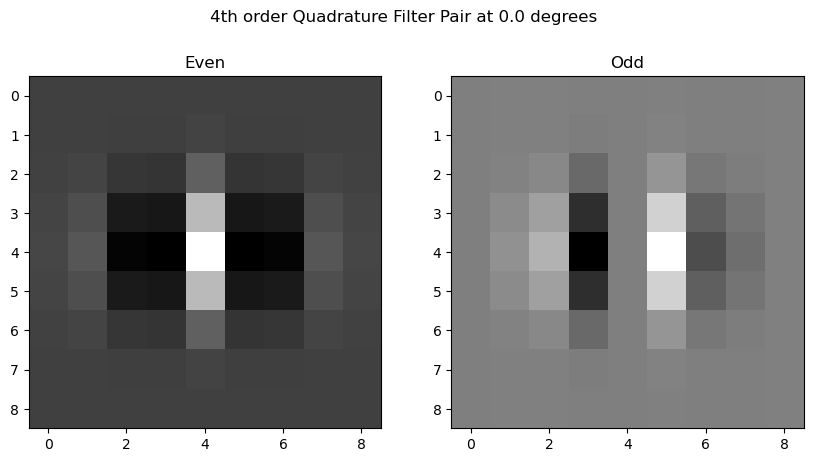

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"4th order Quadrature Filter Pair at {np.degrees(theta)} degrees")
ax[0].imshow(G4, cmap='gray')
ax[0].set_title("Even")
ax[1].imshow(H4, cmap='gray')
ax[1].set_title("Odd");

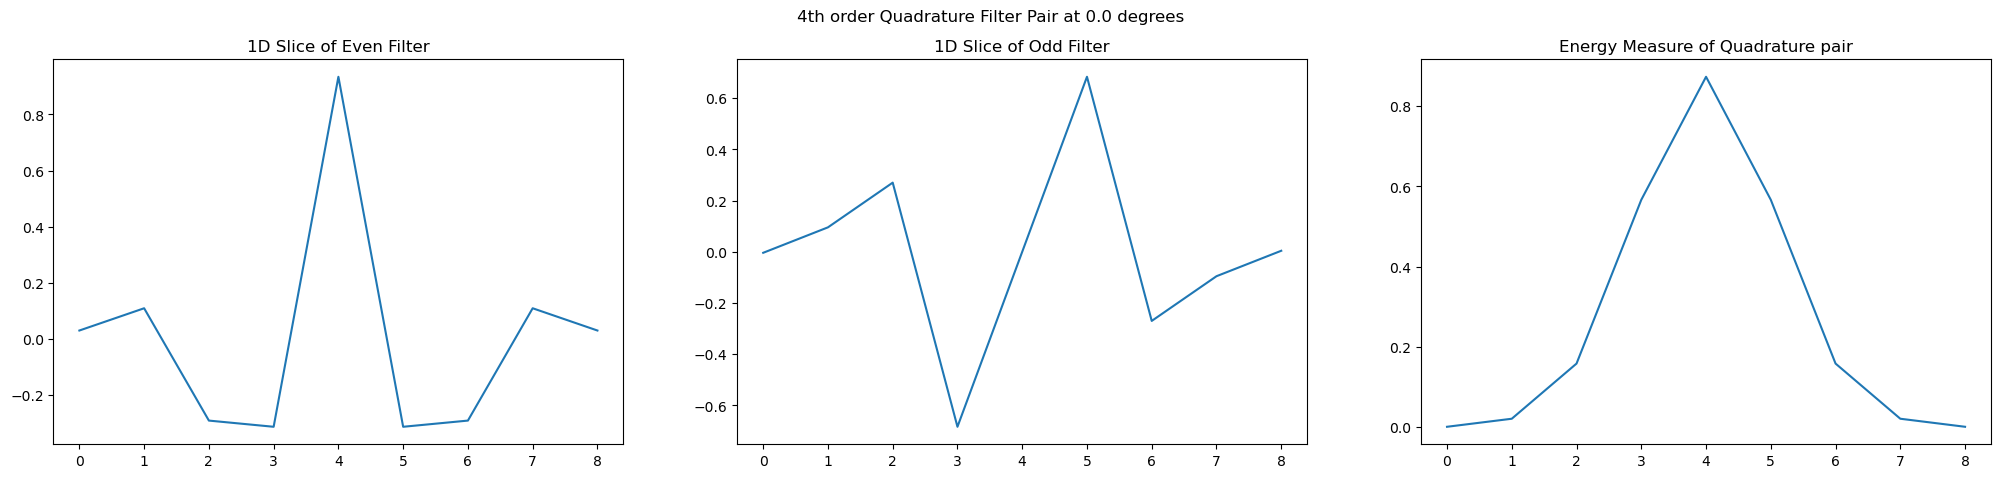

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
fig.suptitle(f"4th order Quadrature Filter Pair at {np.degrees(theta)} degrees")
ax[0].plot(G4[n//2, :])
ax[0].set_title("1D Slice of Even Filter")
ax[1].plot(H4[n//2, :])
ax[1].set_title("1D Slice of Odd Filter"); 
ax[2].plot(G4[n//2, :]**2 + H4[n//2, :]**2)
ax[2].set_title("Energy Measure of Quadrature pair"); 

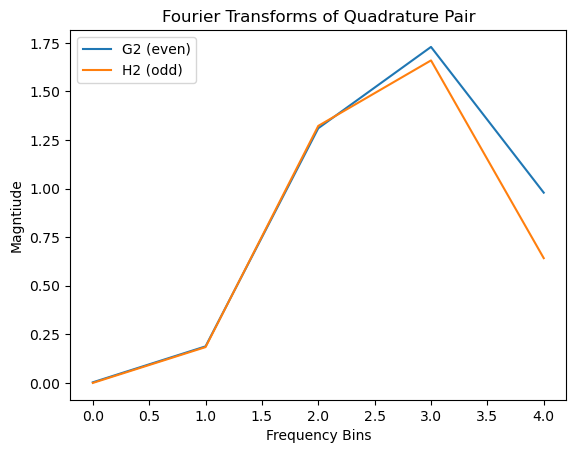

In [10]:
G4F = np.fft.rfft(G4[n//2, :])
H4F = np.fft.rfft(H4[n//2, :])

plt.plot(np.abs(G4F), label='G2 (even)')
plt.plot(np.abs(H4F), label='H2 (odd)');
plt.title("Fourier Transforms of Quadrature Pair");
plt.xlabel("Frequency Bins")
plt.ylabel("Magntiude")
plt.legend();

In [11]:
G4.sum(), H4.sum()

(-0.008332678891993562, 5.888107181190906e-16)

In [53]:
from skimage.data import camera, brick

test_image = camera()
test_image = brick()

# get complex test image
# test_image = get_test_image(512).astype(np.float32)

# 0-1 normalize
test_image = cv2.normalize(test_image, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)

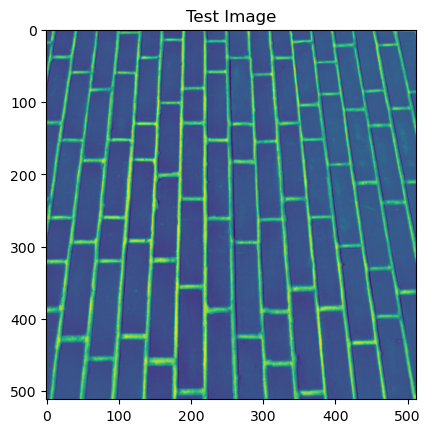

In [54]:
plt.imshow(test_image)
plt.title("Test Image");

In [55]:
RG4 = cv2.filter2D(test_image, ddepth=-1, kernel=G4)
RH4 = cv2.filter2D(test_image, ddepth=-1, kernel=H4)

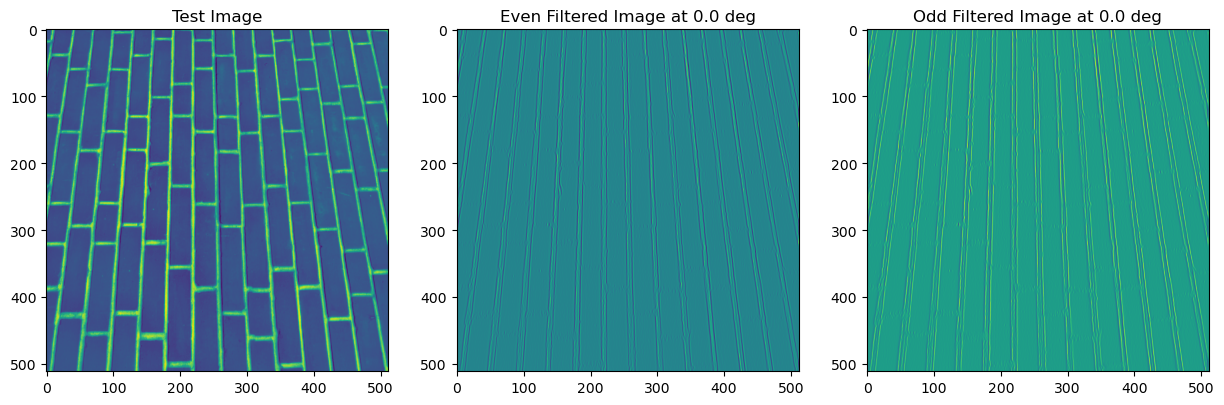

In [56]:
_, ax = plt.subplots(1, 3, figsize=(15, 7))
ax[0].imshow(test_image)
ax[0].set_title("Test Image")
ax[1].imshow(RG4)
ax[1].set_title(f"Even Filtered Image at {np.degrees(theta)} deg");
ax[2].imshow(RH4)
ax[2].set_title(f"Odd Filtered Image at {np.degrees(theta)} deg");

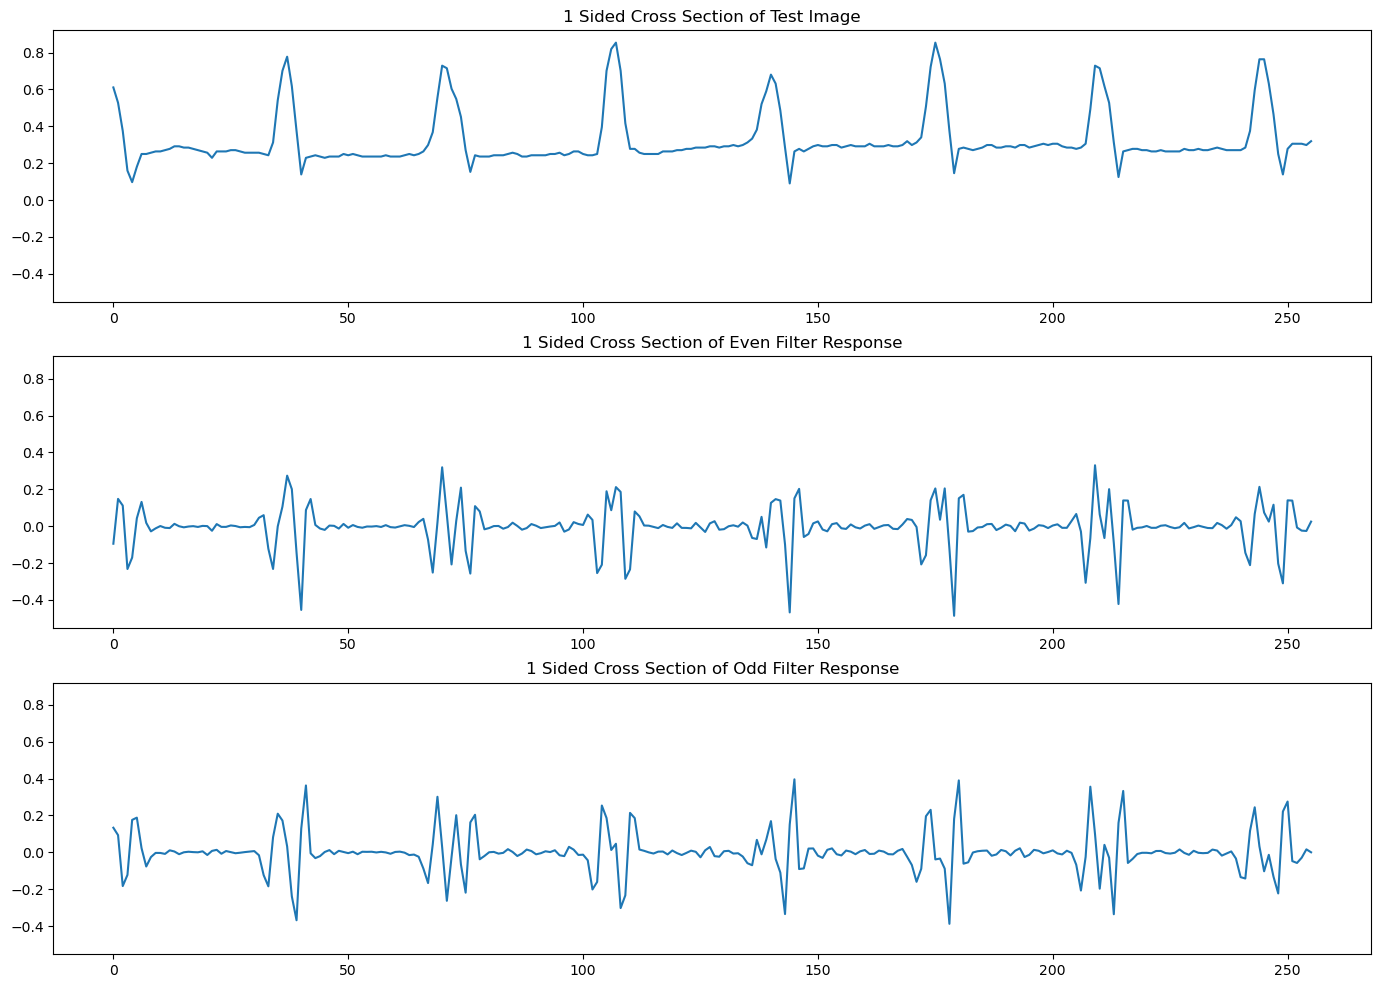

In [57]:
_, ax  = plt.subplots(3, 1, figsize=(17, 12), sharey=True)
ax[0].plot(test_image[256, 256:])
ax[0].set_title("1 Sided Cross Section of Test Image");
ax[1].plot(RG4[256, 256:])
ax[1].set_title("1 Sided Cross Section of Even Filter Response");
ax[2].plot(RH4[256, 256:])
ax[2].set_title("1 Sided Cross Section of Odd Filter Response");

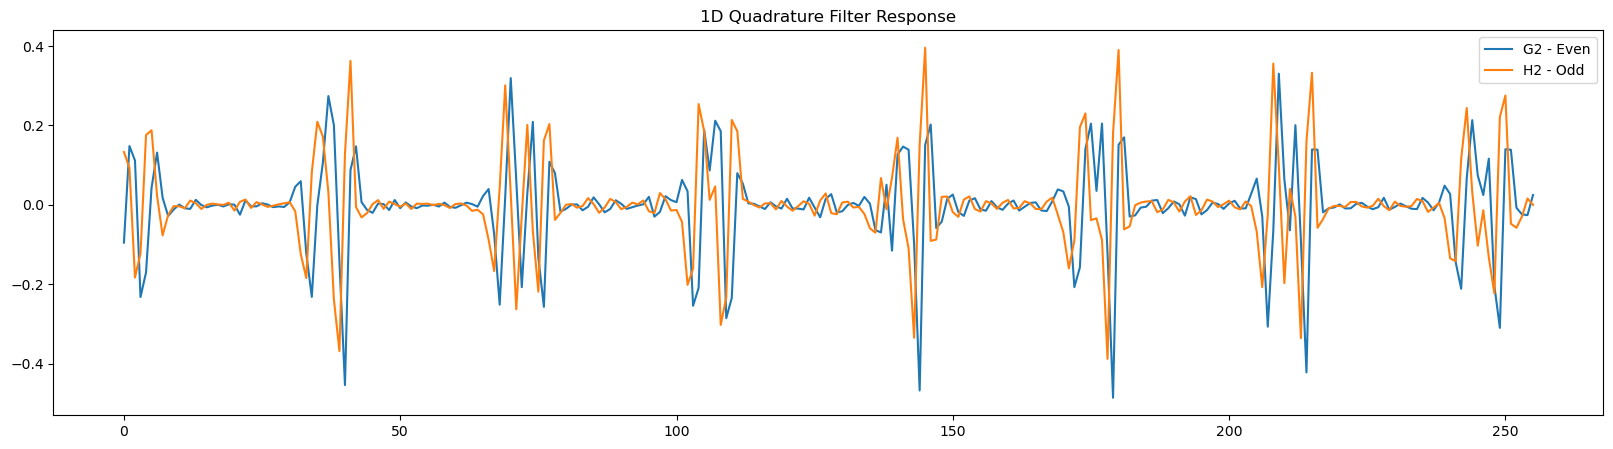

In [58]:
plt.figure(figsize=(20, 5))
plt.plot(RG4[256, 256:], label='G2 - Even')
plt.plot(RH4[256, 256:], label='H2 - Odd')
plt.title("1D Quadrature Filter Response")
plt.legend();

In [59]:
angle = np.arctan2(RH4, RG4)
magnitude = np.sqrt(np.square(RG4**2 + RH4**2))

In [65]:
angle.min(), angle.max(), angle.mean()

(-3.1415927, 3.1415927, -0.10617129)

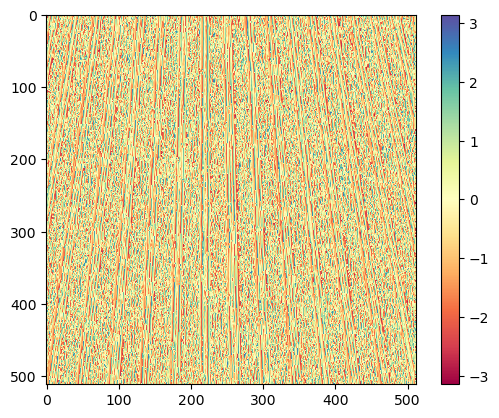

In [61]:
plt.imshow(angle, cmap='Spectral')
plt.colorbar();

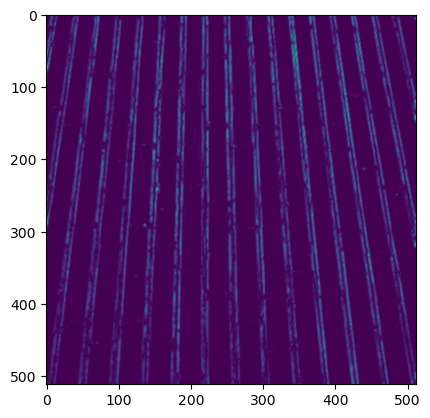

In [66]:
plt.imshow(magnitude)

In [62]:
img_rows, img_cols = test_image.shape

In [63]:
orientations = np.zeros_like(test_image)
for i in range(4, img_rows, 4):
    for j in range(4, img_cols, 4):
        start_point = (j, i)
        end_point = (j + np.round(magnitude[i,j] * np.sin(angle[i,j])).astype(int),
                     i + np.round(magnitude[i,j] * np.cos(angle[i,j])).astype(int))
        # end_point = (j + np.round(10 * np.sin(angle[i,j])).astype(int),
        #              i + np.round(10 * np.cos(angle[i,j])).astype(int))
        cv2.line(orientations, start_point, end_point, (255,), 1)

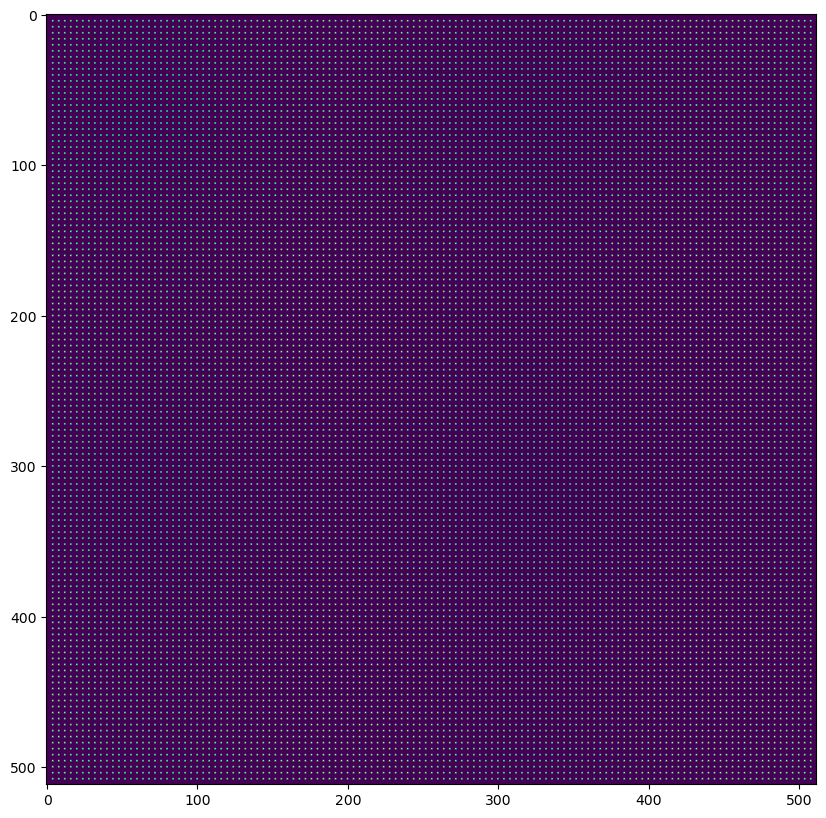

In [64]:
plt.figure(figsize=(10, 10))
plt.imshow(orientations)